![ML Processing](ML.jpg)

<hr/>

<center>
    
# <u>                                                           Assisgnment 1 </u>

#### Name of the Dataset: Set-3 [Carbon Emissions_Dataset]
</center>

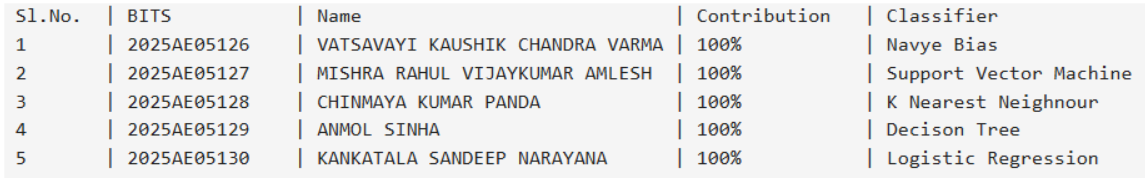

In [1]:
from IPython.display import Image, display
display(Image(filename='Team details.png'))

#### Name of the classifiers Used: <b> Logistic Regression,  Decison Tree,  K Nearest Neighnour,  Support Vector Machine,  Naive Bias </b> 

# 1.	Import Libraries/Dataset

In [2]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.stats import entropy

<hr/><hr/>

# 2.	Data Visualization and Exploration

In [3]:
# ============================================
# DATA LOADING AND PREPROCESSING
# ============================================

print("="*80)
print("DATA LOADING AND PREPROCESSING")

print("OBJECTIVE: Classify whether emissions are HIGH or LOW based on historical data")
print("="*80)

print(" "*20 + "CARBON EMISSIONS CLASSIFICATION")
print("="*80)
print("\n" + "="*80)
print(" DATA LOADING AND PREPROCESSING")
print("="*80)

# Load data
co2_DF = pd.read_csv("CSV_Files/carbon_emissions.csv")
print(f"\n Original data shape: {co2_DF.shape}")
print(f"\n Columns: {list(co2_DF.columns)}")

# (a) Print 2 rows for sanity check — quick way to verify features and see if target already exists
print("\n=== Data info ===")
print(co2_DF.info())
print("\n=== Basic statistics (all columns) ===")
print(co2_DF.describe(include='all'))


DATA LOADING AND PREPROCESSING
OBJECTIVE: Classify whether emissions are HIGH or LOW based on historical data
                    CARBON EMISSIONS CLASSIFICATION

 DATA LOADING AND PREPROCESSING

 Original data shape: (15797, 10)

 Columns: ['year', 'parent_entity', 'production_value', 'production_unit', 'product_emissions_MtCO2', 'flaring_emissions_MtCO2', 'venting_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e', 'fugitive_methane_emissions_MtCH4', 'total_emissions_MtCO2e']

=== Data info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15797 entries, 0 to 15796
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               15797 non-null  int64  
 1   parent_entity                      15797 non-null  object 
 2   production_value                   15797 non-null  float64
 3   production_unit                    15797 non-null  object 
 4

<hr/><hr/>

# 3.	Data Pre-processing and cleaning

In [4]:

# -------------------------
# CLEANING AND IMPUTATION
# -------------------------

# Drop duplicates
# Justification: Exact duplicate rows add no new information and can bias counts.
# If duplicates represent valid repeated measurements (time series, different sources), reconsider dropping.                            
co2_DF = co2_DF.drop_duplicates() 
print(f"\n After removing duplicates: {co2_DF.shape}")


# Identify categorical and numeric columns
categorical_cols = co2_DF.select_dtypes(include=['object','category','string']).columns.tolist()

numeric_cols = co2_DF.select_dtypes(include=['int64', 'float64', 'int32', 'float32','number','float','int']).columns.tolist()

print("Categorical columns",categorical_cols)
print("Numerical columns",numeric_cols)

# Fill numeric NaNs with median
# Justification: Median is robust to outliers and skewed distributions (common in emissions co2_DF).
# Alternative: mean (sensitive to outliers), KNN or iterative imputation (more complex but sometimes better). 
for col in numeric_cols:
    col_median = co2_DF[col].median()
    co2_DF[col] = co2_DF[col].fillna(col_median)
    
# Fill categorical NaNs with 'Unknown'
# Justification: Preserves row while indicating missing category; avoids arbitrary imputation.
# Alternative: create 'Missing' level, or infer from other columns if possible.
for col in categorical_cols:
    co2_DF[col] = co2_DF[col].fillna('Unknown')

co2_DF = co2_DF.dropna()
print(f" After removing missing values: {co2_DF.shape}")
print(f"\n First few rows:")
# Store original parent entities for visualization
original_entities = co2_DF['parent_entity'].copy()

co2_DF


 After removing duplicates: (15794, 10)
Categorical columns ['parent_entity', 'production_unit']
Numerical columns ['year', 'production_value', 'product_emissions_MtCO2', 'flaring_emissions_MtCO2', 'venting_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e', 'fugitive_methane_emissions_MtCH4', 'total_emissions_MtCO2e']
 After removing missing values: (15794, 10)

 First few rows:


,year,parent_entity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,0.9125,Million bbl/yr,0.338928,0.005404,0.001299,0.018254,0.000652,0.363885
1,1963,Abu Dhabi National Oil Company,1.8250,Million bbl/yr,0.677855,0.010808,0.002598,0.036508,0.001304,0.727770
2,1964,Abu Dhabi National Oil Company,7.3000,Million bbl/yr,2.711422,0.043233,0.010392,0.146033,0.005215,2.911079
3,1965,Abu Dhabi National Oil Company,10.9500,Million bbl/yr,4.067132,0.064849,0.015588,0.219049,0.007823,4.366618
4,1966,Abu Dhabi National Oil Company,13.5050,Million bbl/yr,5.016130,0.079980,0.019225,0.270160,0.009649,5.385495
...,...,...,...,...,...,...,...,...,...,...
15792,2020,YPF,394.0000,Bcf/yr,21.052898,0.036539,0.600718,5.823079,0.207967,28.718814
15793,2021,YPF,90.0000,Million bbl/yr,33.428485,0.533005,0.128118,1.800403,0.064300,35.890011
15794,2021,YPF,403.0000,Bcf/yr,21.533801,0.037373,0.614440,5.956093,0.212718,29.374827
15795,2022,YPF,98.0000,Million bbl/yr,36.399906,0.580383,0.139506,1.960438,0.070016,39.080234


## Exploratory Data Analysis

In [5]:


# Convert categorical columns to numeric via Label encoder for testing only
label_enc = LabelEncoder()
if 'parent_entity' in co2_DF.columns:
    co2_DF['parent_entity'] = label_enc.fit_transform(co2_DF['parent_entity'])
if 'production_unit' in co2_DF.columns:
    co2_DF['production_unit'] = label_enc.fit_transform(co2_DF['production_unit'])

data_DF = co2_DF.copy()
data_DF

,year,parent_entity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_emissions_MtCO2e
0,1962,1,0.9125,2,0.338928,0.005404,0.001299,0.018254,0.000652,0.363885
1,1963,1,1.8250,2,0.677855,0.010808,0.002598,0.036508,0.001304,0.727770
2,1964,1,7.3000,2,2.711422,0.043233,0.010392,0.146033,0.005215,2.911079
3,1965,1,10.9500,2,4.067132,0.064849,0.015588,0.219049,0.007823,4.366618
4,1966,1,13.5050,2,5.016130,0.079980,0.019225,0.270160,0.009649,5.385495
...,...,...,...,...,...,...,...,...,...,...
15792,2020,121,394.0000,0,21.052898,0.036539,0.600718,5.823079,0.207967,28.718814
15793,2021,121,90.0000,2,33.428485,0.533005,0.128118,1.800403,0.064300,35.890011
15794,2021,121,403.0000,0,21.533801,0.037373,0.614440,5.956093,0.212718,29.374827
15795,2022,121,98.0000,2,36.399906,0.580383,0.139506,1.960438,0.070016,39.080234


In [6]:
# Ensure numeric columns are proper dtype
co2_DF[numeric_cols] = co2_DF[numeric_cols].apply(pd.to_numeric, errors='coerce')
co2_DF = co2_DF.dropna()

print(f"\n Data shape before encoding: {co2_DF.shape}")

print("\n" + "="*80)
print("ONE-HOT ENCODING FOR CATEGORICAL VARIABLES")
print("="*80)

print("\n🔄 Converting categorical variables to binary (boolean) features...")
print("   This creates separate binary columns for each category")
print("   Better for decision trees - no ordinal relationship assumed")

# Store data before encoding for comparison
data_before_encoding = co2_DF.copy()

# Apply One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
categorical_data = co2_DF[categorical_cols]

encoded_features = ohe.fit_transform(categorical_data)
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)

print(f"\n📊 Encoding Statistics:")
print(f"   Original categorical columns: {len(categorical_cols)}")
print(f"   Number of unique categories:")
for col in categorical_cols:
    print(f"      - {col}: {co2_DF[col].nunique()} unique values")

print(f"\n   After One-Hot Encoding:")
print(f"      - Total binary features created: {len(encoded_feature_names)}")
print(f"      - Each feature is now 0 (False) or 1 (True)")


# Create DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=co2_DF.index)

encoded_df


 Data shape before encoding: (15794, 10)

ONE-HOT ENCODING FOR CATEGORICAL VARIABLES

🔄 Converting categorical variables to binary (boolean) features...
   This creates separate binary columns for each category
   Better for decision trees - no ordinal relationship assumed

📊 Encoding Statistics:
   Original categorical columns: 2
   Number of unique categories:
      - parent_entity: 122 unique values
      - production_unit: 4 unique values

   After One-Hot Encoding:
      - Total binary features created: 124
      - Each feature is now 0 (False) or 1 (True)


,parent_entity_1,parent_entity_2,parent_entity_3,parent_entity_4,parent_entity_5,parent_entity_6,parent_entity_7,parent_entity_8,parent_entity_9,parent_entity_10,...,parent_entity_115,parent_entity_116,parent_entity_117,parent_entity_118,parent_entity_119,parent_entity_120,parent_entity_121,production_unit_1,production_unit_2,production_unit_3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Feature Engineering

In [7]:

# Drop original categorical columns and add encoded ones hence getting Label encoder equivalent dataset
co2_DF = co2_DF.drop(columns=categorical_cols)
co2_DF = pd.concat([co2_DF, encoded_df], axis=1)

print(f"\n Final preprocessed data shape: {co2_DF.shape}")
print(f"   (Increased from {data_before_encoding.shape[1]} to {co2_DF.shape[1]} columns)")

# Show sample of encoded features
print(f"\n📋 Sample of One-Hot Encoded Features:")
print(f"   First 5 encoded feature names:")
for i, name in enumerate(encoded_feature_names[:5], 1):
    print(f"   {i}. {name}")
if len(encoded_feature_names) > 5:
    print(f"   ... and {len(encoded_feature_names) - 5} more binary features")

# Update numeric_columns to include all columns except target
numeric_columns = [col for col in co2_DF.columns if col != 'total_emissions_MtCO2e']



 Final preprocessed data shape: (15794, 132)
   (Increased from 10 to 132 columns)

📋 Sample of One-Hot Encoded Features:
   First 5 encoded feature names:
   1. parent_entity_1
   2. parent_entity_2
   3. parent_entity_3
   4. parent_entity_4
   5. parent_entity_5
   ... and 119 more binary features


## Feature Selection & Extraction

In [8]:

# ============================================
# TARGET VARIABLE CREATION
# ============================================

print("\n" + "="*80)
print(" CREATING TARGET VARIABLE (CLASSIFICATION TASK)")
print("="*80)

test_train_split_ratio = float(input("Enter percentage (%) of total data to be put in Testing dataset :"))/100

# Here the output column is 'total_emissions_MtCO2e' which represents data in specified units (metric tonnes annually), 
# which we will classify based on median estimation method, using median as threshold. 
# Other estimates of central tendency like Mean or Mode may also be used.
# Hence, we create binary target based on median, Hence as per boolean Logic to Integer, 
# i.e, True==1, and, False==0 for integer casting, which would be easier to classify/predict numerically.
median_emission = co2_DF['total_emissions_MtCO2e'].median()
co2_DF['is_high_emission'] = (co2_DF['total_emissions_MtCO2e'] > median_emission).astype(int)

data_DF['is_high_emission'] = (data_DF['total_emissions_MtCO2e'] > median_emission).astype(int) # maintaning a copy against original dataset

print(f"\n TARGET VARIABLE: 'is_high_emission'")
print(f"\n Median emission: {median_emission:.4f}")
print(f"   - 0 (Low Emission): total_emissions <= {median_emission:.4f} MtCO2e")
print(f"   - 1 (High Emission): total_emissions > {median_emission:.4f} MtCO2e")
print(f"\n Class Distribution:")
print(f"   - High emission samples (1): {np.sum(co2_DF['is_high_emission'] == 1)} ({np.sum(co2_DF['is_high_emission'] == 1)/len(co2_DF)*100:.1f}%)")
print(f"   - Low emission samples (0): {np.sum(co2_DF['is_high_emission'] == 0)} ({np.sum(co2_DF['is_high_emission'] == 0)/len(co2_DF)*100:.1f}%)")

# Prepare features and target
X = co2_DF.drop(columns=['is_high_emission'])
y = co2_DF['is_high_emission']
feature_names = X.columns.tolist()

print(f"\n Final Feature Set:")
print(f"   Total features: {len(feature_names)}")
print(f"   - Numeric features: {len([f for f in feature_names if f in numeric_columns])}")
print(f"   - One-Hot Encoded features: {len([f for f in feature_names if f not in numeric_columns])}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_train_split_ratio, random_state=42, stratify=y)

print(f"\n Training samples: {X_train.shape[0]}")
print(f" Testing samples: {X_test.shape[0]}")

# Scale ONLY numeric features (not one-hot encoded features which are already 0/1)
scaler = StandardScaler()

# Identify which columns to scale (exclude one-hot encoded)
cols_to_scale = [col for col in X.columns if col in numeric_columns]
cols_not_to_scale = [col for col in X.columns if col not in numeric_columns]

print(f"\n Feature Scaling:")
print(f"   Scaling {len(cols_to_scale)} numeric features")
print(f"   Keeping {len(cols_not_to_scale)} one-hot encoded features as 0/1")

# Scale numeric features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Convert to numpy arrays for the from-scratch model
X_train_scaled_array = X_train_scaled.values
X_test_scaled_array = X_test_scaled.values

# X_train.to_csv("CSV_Files/train_features_co2.csv", index=False)
# X_test.to_csv("CSV_Files/test_features_co2.csv", index=False)
# y_train.to_csv("CSV_Files/train_labels_co2.csv", index=False)
# y_test.to_csv("CSV_Files/test_labels_co2.csv", index=False)

# ============================================
# CORRELATION ANALYSIS
# ============================================

print("\n" + "="*80)
print(" FEATURE CORRELATION ANALYSIS")
print("="*80)

# Correlation matrix
correlation_data = data_DF[numeric_cols + ['is_high_emission']].corr()

# Show top correlations with target
target_corr = correlation_data['is_high_emission'].drop('is_high_emission').sort_values(ascending=False)
print("\n📊 Top Features Correlated with Target (is_high_emission):")
for feature, corr_value in target_corr.items():
    print(f"   {feature:40s}: {corr_value:+.4f}")




 CREATING TARGET VARIABLE (CLASSIFICATION TASK)


Enter percentage (%) of total data to be put in Testing dataset : 30



 TARGET VARIABLE: 'is_high_emission'

 Median emission: 25.1183
   - 0 (Low Emission): total_emissions <= 25.1183 MtCO2e
   - 1 (High Emission): total_emissions > 25.1183 MtCO2e

 Class Distribution:
   - High emission samples (1): 7897 (50.0%)
   - Low emission samples (0): 7897 (50.0%)

 Final Feature Set:
   Total features: 132
   - Numeric features: 131
   - One-Hot Encoded features: 1

 Training samples: 11055
 Testing samples: 4739

 Feature Scaling:
   Scaling 131 numeric features
   Keeping 1 one-hot encoded features as 0/1

 FEATURE CORRELATION ANALYSIS

📊 Top Features Correlated with Target (is_high_emission):
   total_emissions_MtCO2e                  : +0.2775
   product_emissions_MtCO2                 : +0.2748
   year                                    : +0.2676
   flaring_emissions_MtCO2                 : +0.2653
   fugitive_methane_emissions_MtCO2e       : +0.2500
   fugitive_methane_emissions_MtCH4        : +0.2500
   production_value                        : +0.2319


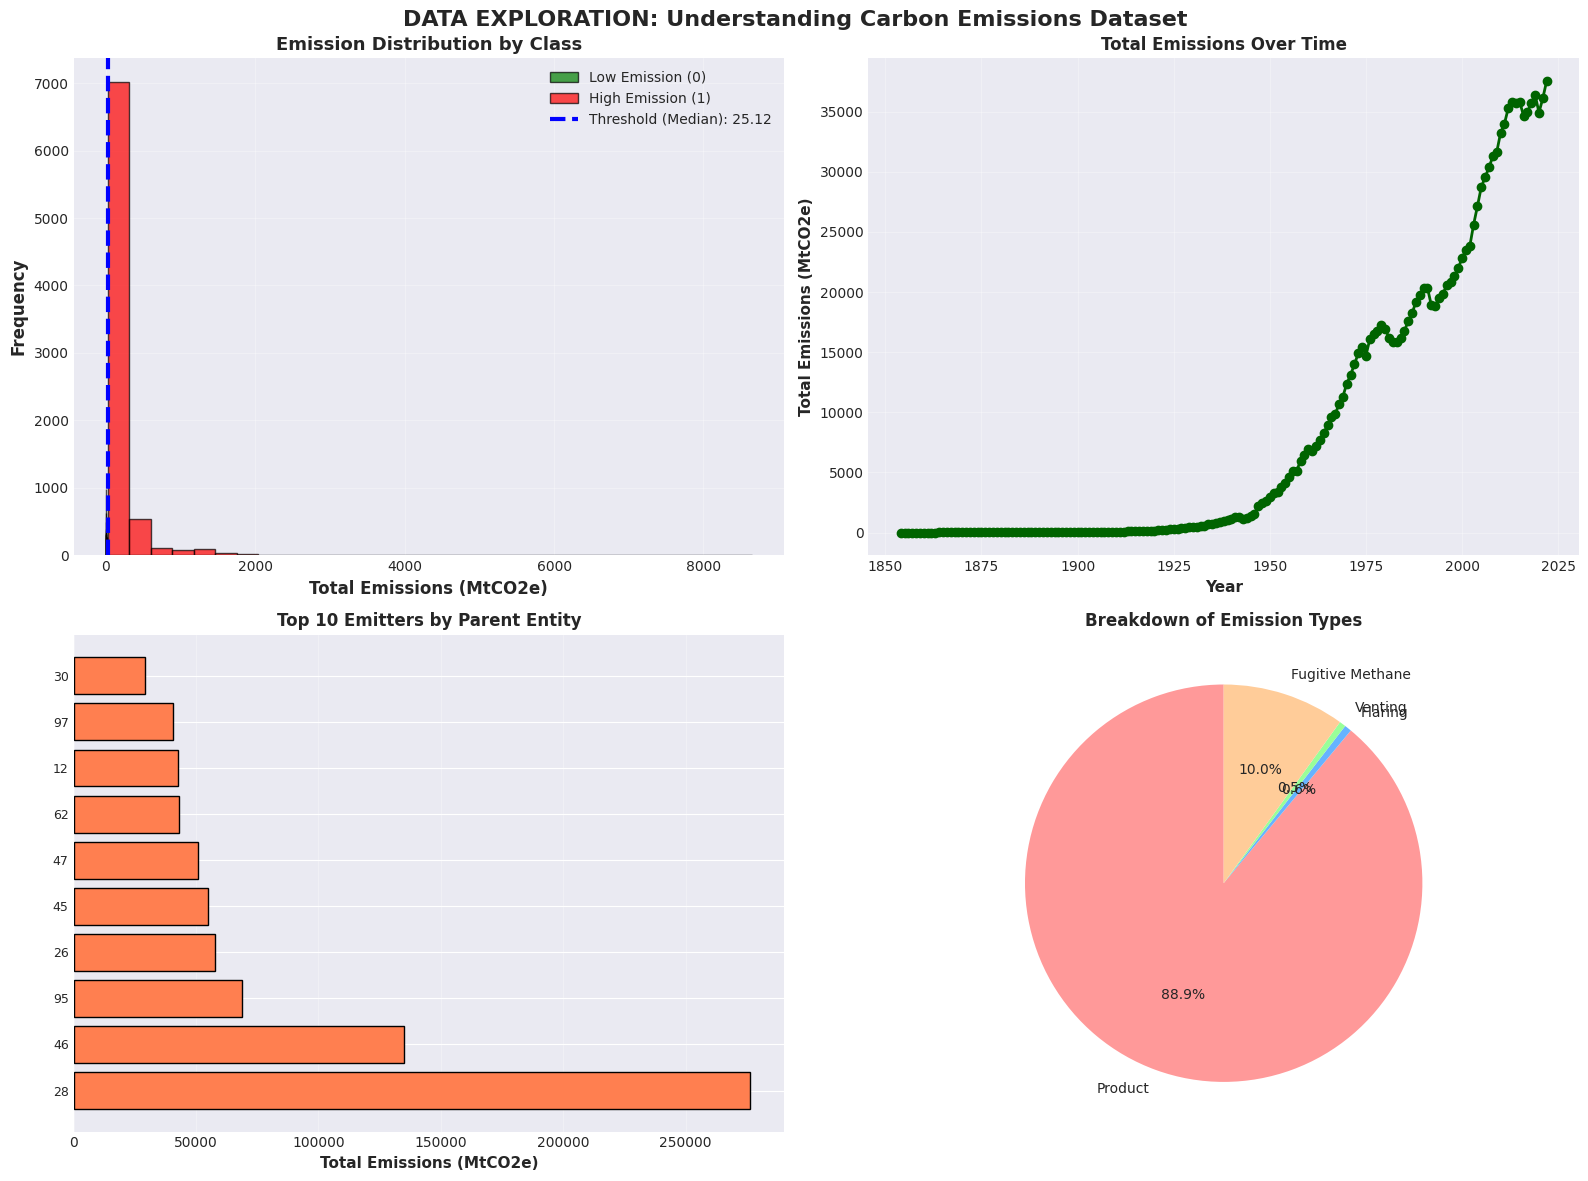

In [9]:

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure for data overview
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DATA EXPLORATION: Understanding Carbon Emissions Dataset', 
             fontsize=16, fontweight='bold')

# Plot 1: Total emissions distribution with threshold
ax1 = axes[0, 0]
ax1.hist(co2_DF[co2_DF['is_high_emission'] == 0]['total_emissions_MtCO2e'], 
         bins=30, alpha=0.7, label='Low Emission (0)', color='green', edgecolor='black')
ax1.hist(co2_DF[co2_DF['is_high_emission'] == 1]['total_emissions_MtCO2e'], 
         bins=30, alpha=0.7, label='High Emission (1)', color='red', edgecolor='black')
ax1.axvline(median_emission, color='blue', linestyle='--', linewidth=3, 
            label=f'Threshold (Median): {median_emission:.2f}')
ax1.set_xlabel('Total Emissions (MtCO2e)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Emission Distribution by Class', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Emissions over time
ax2 = axes[0, 1]
yearly_emissions = co2_DF.groupby('year')['total_emissions_MtCO2e'].sum()
ax2.plot(yearly_emissions.index, yearly_emissions.values, marker='o', 
         linewidth=2, markersize=6, color='darkgreen')
ax2.set_xlabel('Year', fontsize=11, fontweight='bold')
ax2.set_ylabel('Total Emissions (MtCO2e)', fontsize=11, fontweight='bold')
ax2.set_title('Total Emissions Over Time', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Top emitters
ax3 = axes[1, 0]
top_emitters = data_DF.groupby('parent_entity')['total_emissions_MtCO2e'].sum().sort_values(ascending=False).head(10)
ax3.barh(range(len(top_emitters)), top_emitters.values, color='coral', edgecolor='black')
ax3.set_yticks(range(len(top_emitters)))
ax3.set_yticklabels(top_emitters.index, fontsize=9)
ax3.set_xlabel('Total Emissions (MtCO2e)', fontsize=11, fontweight='bold')
ax3.set_title('Top 10 Emitters by Parent Entity', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Plot 4: Emission types breakdown
ax4 = axes[1, 1]
emission_types = ['product_emissions_MtCO2', 'flaring_emissions_MtCO2', 
                  'venting_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e']
emission_sums = [co2_DF[col].sum() for col in emission_types]
colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
ax4.pie(emission_sums, labels=['Product', 'Flaring', 'Venting', 'Fugitive Methane'], 
        autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax4.set_title('Breakdown of Emission Types', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


<hr/><hr/>

# 4. Model building

#### 1.) Logistic Regression by Kankatala Sandeep Narayana (ID: 2025AE05130)

=== Logistic Regression Evaluation ===
Accuracy: 0.9975
ROC AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0     0.9979    0.9970    0.9975      2370
           1     0.9970    0.9979    0.9975      2369

    accuracy                         0.9975      4739
   macro avg     0.9975    0.9975    0.9975      4739
weighted avg     0.9975    0.9975    0.9975      4739

Confusion Matrix:
 [[2363    7]
 [   5 2364]]


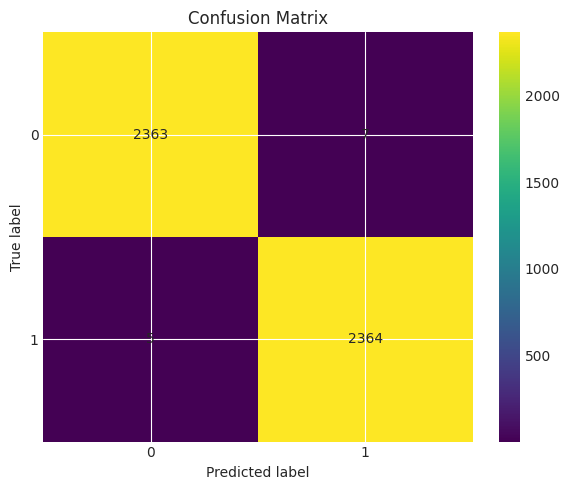

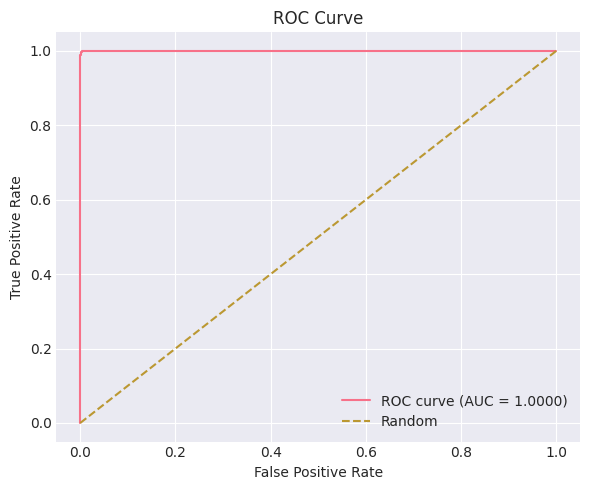

In [10]:
# -------------------------
# Logistic Regression
# -------------------------

# Flatten y_train/y_test (convert to 1D arrays)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability for ROC curve

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)
cm = confusion_matrix(y_test, y_pred)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Results
print("=== Logistic Regression Evaluation ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}\n")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', aspect='auto', cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.xticks([0,1])
plt.yticks([0,1])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center")
plt.tight_layout()
plt.show()

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

<hr/>

#### 2.) Decison Tree by ANMOL SINHA (ID: 2025AE05129)

In [11]:

# ==================================================
# DECISION TREE FROM SCRATCH MANUAL IMPLEMENTATION
# ==================================================

class Binary_Tree_Node:
    """Binary_Tree_Node class for Decision Tree"""
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature      # Feature index to split on
        self.threshold = threshold  # Threshold value for split
        self.left = left           # Left child node
        self.right = right         # Right child node
        self.value = value         # Class value if leaf node

class Decision_Tree_Manual_Original:
    """Decision Tree Classifier implemented from scratch with regularization"""
    
    def __init__(self, max_depth=10, min_samples_split=2, min_samples_leaf=1, 
                 min_impurity_decrease=0.0, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf  # NEW: Minimum samples in leaf nodes
        self.min_impurity_decrease = min_impurity_decrease  # NEW: Minimum gain required to split
        self.max_features = max_features  # NEW: Limit features considered per split
        self.root = None
        self.feature_importances_ = None
        self.feature_names = None
        
    def calculate_entropy(self, y):
        """
        Calculate entropy of a dataset
        Entropy = -Σ(p_i * log2(p_i))
        where p_i is the proportion of class i
        """
        if len(y) == 0:
            return 0
        
        # Get unique classes and their counts
        _, counts = np.unique(y, return_counts=True)
        
        # Calculate probabilities
        probabilities = counts / len(y)
        
        # Calculate entropy (avoid log(0) by filtering)
        entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
        
        return entropy
    
    def calculate_information_gain(self, X_column, y, threshold):
        """
        Calculate information gain for a split
        Information Gain = Entropy(parent) - Weighted_Average_Entropy(children)
        """
        # Parent entropy
        parent_entropy = self.calculate_entropy(y)
        
        # Split data
        left_mask = X_column <= threshold
        right_mask = X_column > threshold
        
        # If split doesn't divide data, return 0
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return 0
        
        # Calculate weighted entropy of children
        n = len(y)
        n_left = np.sum(left_mask)
        n_right = np.sum(right_mask)
        
        entropy_left = self.calculate_entropy(y[left_mask])
        entropy_right = self.calculate_entropy(y[right_mask])
        
        weighted_entropy = (n_left / n) * entropy_left + (n_right / n) * entropy_right
        
        # Information gain
        information_gain = parent_entropy - weighted_entropy
        
        return information_gain
    
    def find_best_split(self, X, y):
        """
        Find the best feature and threshold to split on
        Returns: best_feature, best_threshold, best_gain
        """
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        
        # NEW: Feature subsampling for regularization
        if self.max_features is not None:
            # Randomly select a subset of features to consider
            n_features_to_try = min(self.max_features, n_features)
            feature_indices = np.random.choice(n_features, n_features_to_try, replace=False)
        else:
            feature_indices = range(n_features)
        
        # Try each feature
        for feature_idx in feature_indices:
            X_column = X[:, feature_idx]
            
            # Try different thresholds (using unique values)
            thresholds = np.unique(X_column)
            
            # NEW: Limit number of thresholds to check (for efficiency and regularization)
            if len(thresholds) > 20:
                # Sample 20 evenly spaced thresholds
                threshold_indices = np.linspace(0, len(thresholds)-1, 20, dtype=int)
                thresholds = thresholds[threshold_indices]
            
            for threshold in thresholds:
                # Calculate information gain
                gain = self.calculate_information_gain(X_column, y, threshold)
                
                # Update best split if this is better
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_gain
    
    def build_tree(self, X, y, depth=0):
        """
        Recursively build the decision tree with regularization
        """
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        # NEW: Enhanced stopping criteria for regularization
        if (depth >= self.max_depth or 
            n_classes == 1 or 
            n_samples < self.min_samples_split):
            # Create leaf node with majority class
            leaf_value = np.argmax(np.bincount(y.astype(int)))
            return Binary_Tree_Node(value=leaf_value)
        
        # Find best split
        best_feature, best_threshold, best_gain = self.find_best_split(X, y)
        
        # NEW: Stop if gain is below minimum threshold (regularization)
        if best_gain < self.min_impurity_decrease:
            leaf_value = np.argmax(np.bincount(y.astype(int)))
            return Binary_Tree_Node(value=leaf_value)
        
        # If no good split found, create leaf node
        if best_gain == 0:
            leaf_value = np.argmax(np.bincount(y.astype(int)))
            return Binary_Tree_Node(value=leaf_value)
        
        # Split data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold
        
        # NEW: Check minimum samples in leaf nodes (regularization)
        n_left = np.sum(left_mask)
        n_right = np.sum(right_mask)
        
        if n_left < self.min_samples_leaf or n_right < self.min_samples_leaf:
            # Don't split if either child would be too small
            leaf_value = np.argmax(np.bincount(y.astype(int)))
            return Binary_Tree_Node(value=leaf_value)
        
        # Recursively build left and right subtrees
        left_child = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_child = self.build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return Binary_Tree_Node(feature=best_feature, threshold=best_threshold, 
                   left=left_child, right=right_child)
    
    def fit(self, X, y, feature_names=None):
        """Train the decision tree"""
        self.feature_names = feature_names
        self.root = self.build_tree(X, y)
        return self
    
    def predict_sample(self, x, node):
        """Predict class for a single sample"""
        # If leaf node, return value
        if node.value is not None:
            return node.value
        
        # Traverse tree based on feature value
        if x[node.feature] <= node.threshold:
            return self.predict_sample(x, node.left)
        else:
            return self.predict_sample(x, node.right)
    
    def predict(self, X):
        """Predict classes for multiple samples"""
        return np.array([self.predict_sample(x, self.root) for x in X])
    
    def predict_proba(self, X):
        """Predict probabilities - simplified version"""
        predictions = self.predict(X)
        proba = np.zeros((len(X), 2))
        proba[predictions == 0, 0] = 1
        proba[predictions == 1, 1] = 1
        return proba
    
    def print_tree(self, node=None, depth=0):
        """Print tree structure for visualization"""
        if node is None:
            node = self.root
        
        if node.value is not None:
            print(f"{'  ' * depth}Leaf: Class = {node.value}")
        else:
            print(f"{'  ' * depth}Feature {node.feature} <= {node.threshold:.4f}")
            print(f"{'  ' * depth}Left:")
            self.print_tree(node.left, depth + 1)
            print(f"{'  ' * depth}Right:")
            self.print_tree(node.right, depth + 1)




#### 🛡️ REGULARIZATION TECHNIQUES TO PREVENT OVERFITTING:
   1. max_depth: Limits tree depth (prevents very deep trees)
   2. min_samples_split: Minimum samples required to split a node
   3. min_samples_leaf: Minimum samples required in each leaf node
   4. min_impurity_decrease: Minimum information gain required to split
   5. max_features: Randomly limit features considered per split

In [12]:
print("\n🔄 TRAINING PHASE:")
print(f"   Using {X_train_scaled_array.shape[0]} training samples")
print(f"   Training on {X_train_scaled_array.shape[1]} features")
print(f"      - {len(cols_to_scale)} numeric features (scaled)")
print(f"      - {len(cols_not_to_scale)} one-hot encoded features (boolean 0/1)")

params = {
        'max_depth': np.random.randint(5,10),
        'min_samples_split': np.random.randint(50,90),
        'min_samples_leaf': np.random.randint(10,40),
        'min_impurity_decrease': np.random.random()*1e-2,
        'max_features': int(X_train_scaled_array.shape[1] * np.random.randint(4,10)/10)
        }

# Train final model with best configuration
dt_scratch = Decision_Tree_Manual_Original(**params)
dt_scratch.fit(X_train_scaled_array, y_train.values, feature_names=feature_names)

y_train_pred_temp = dt_scratch.predict(X_train_scaled_array)
y_test_pred_temp = dt_scratch.predict(X_test_scaled_array)

train_acc_temp = accuracy_score(y_train, y_train_pred_temp)
test_acc_temp = accuracy_score(y_test, y_test_pred_temp)
print("\n Decision Tree trained successfully!")

output_eval = {
    'Config': 'Standard random regularization for Decision Tree (to prevent overfitting)',
    'Train_Acc': train_acc_temp,
    'Test_Acc': test_acc_temp,
    'Difference': abs(train_acc_temp - test_acc_temp),
    'Overfit_Score': train_acc_temp - test_acc_temp
}

print("\n--- Tree Structure (first few levels) ---")
dt_scratch.print_tree()

# Entropy and gains calculations
initial_entropy = dt_scratch.calculate_entropy(y_train.values)
print(f"\n📐 Initial Entropy of training data: {initial_entropy:.6f}")
print(f"   (Maximum entropy for binary classification is 1.0 - perfectly balanced)")
print(f"   (Entropy of 0 means all samples belong to one class)")
# Demonstrate information gain for multiple features
print("\n" + "-"*80)
print("Information Gain Analysis for Top 3 Features:")
print("-"*80)

info_gains = []
for feat_idx in range(min(3, X_train_scaled.shape[1])):
    X_col = X_train_scaled_array[:, feat_idx]
    thresholds_sample = np.percentile(X_col, [25, 50, 75])
    
    print(f"\n Feature {feat_idx} ({feature_names[feat_idx]}):")
    for i, thresh in enumerate(thresholds_sample):
        numeric_features_in_X = [col for col in feature_names if col in cols_to_scale][:3]
        for feat_name in numeric_features_in_X:
            feat_idx = feature_names.index(feat_name)
            X_col = X_train_scaled_array[:, feat_idx]
            thresholds_sample = np.percentile(X_col, [25, 50, 75])
            
            # print(f"\n   Feature: {feat_name}")
            for i, thresh in enumerate(thresholds_sample):
                gain = dt_scratch.calculate_information_gain(X_col, y_train.values, thresh)
                info_gains.append({'Feature': feat_name, 
                                  'Feature_Type': 'Numeric',
                                  'Threshold_Percentile': [25, 50, 75][i],
                                  'Threshold_Value': thresh,
                                  'Information_Gain': gain})
            # print(f"      Percentile {[25, 50, 75][i]:2d}% | Threshold: {thresh:+.4f} | Info Gain: {gain:.6f}")

        
        # Analyze one-hot encoded features (boolean)
        # print("\n One-Hot Encoded Features (boolean 0/1):")
        ohe_features_in_X = [col for col in feature_names if col in cols_not_to_scale][:3]
        for feat_name in ohe_features_in_X:
            feat_idx = feature_names.index(feat_name)
            X_col = X_train_scaled_array[:, feat_idx]
            
            # For boolean features, only meaningful threshold is 0.5 (between 0 and 1)
            thresh = 0.5
            gain = dt_scratch.calculate_information_gain(X_col, y_train.values, thresh)
            info_gains.append({'Feature': feat_name,
                              'Feature_Type': 'Boolean (One-Hot)',
                              'Threshold_Percentile': 50,
                              'Threshold_Value': thresh,
                              'Information_Gain': gain})
            
            # Count how feature is distributed
            count_0 = np.sum(X_col == 0)
            count_1 = np.sum(X_col == 1)
            # print(f"\n   Feature: {feat_name}")
            # print(f"      Distribution: {count_0} zeros, {count_1} ones")
            # print(f"      Threshold: {thresh:.1f} | Info Gain: {gain:.6f}")


    # print(f"   Percentile {[25, 50, 75][i]:2d}% | Threshold: {thresh:+.4f} | Info Gain: {gain:.6f}")

# Visualize information gain
info_gain_df = pd.DataFrame(info_gains)
info_gain_df.head(10)


🔄 TRAINING PHASE:
   Using 11055 training samples
   Training on 132 features
      - 131 numeric features (scaled)
      - 1 one-hot encoded features (boolean 0/1)

 Decision Tree trained successfully!

--- Tree Structure (first few levels) ---
Feature 5 <= -0.2069
Left:
  Feature 7 <= 26.3453
  Left:
    Feature 2 <= -0.2222
    Left:
      Leaf: Class = 0
    Right:
      Feature 7 <= 24.9635
      Left:
        Leaf: Class = 0
      Right:
        Leaf: Class = 1
  Right:
    Leaf: Class = 1
Right:
  Feature 7 <= 27.9099
  Left:
    Feature 2 <= -0.2272
    Left:
      Leaf: Class = 0
    Right:
      Feature 7 <= 25.0553
      Left:
        Leaf: Class = 0
      Right:
        Leaf: Class = 1
  Right:
    Leaf: Class = 1

📐 Initial Entropy of training data: 1.000000
   (Maximum entropy for binary classification is 1.0 - perfectly balanced)
   (Entropy of 0 means all samples belong to one class)

--------------------------------------------------------------------------------
Info

,Feature,Feature_Type,Threshold_Percentile,Threshold_Value,Information_Gain
0,year,Numeric,25,-0.549116,0.036133
1,year,Numeric,50,0.250482,0.019586
2,year,Numeric,75,0.737193,0.015468
3,production_value,Numeric,25,-0.266492,0.207637
4,production_value,Numeric,50,-0.225877,0.195201
5,production_value,Numeric,75,-0.067570,0.165466
6,product_emissions_MtCO2,Numeric,25,-0.272011,0.311646
7,product_emissions_MtCO2,Numeric,50,-0.214106,0.846587
8,product_emissions_MtCO2,Numeric,75,-0.061000,0.311269
9,total_emissions_MtCO2e,Boolean (One-Hot),50,0.500000,0.046200


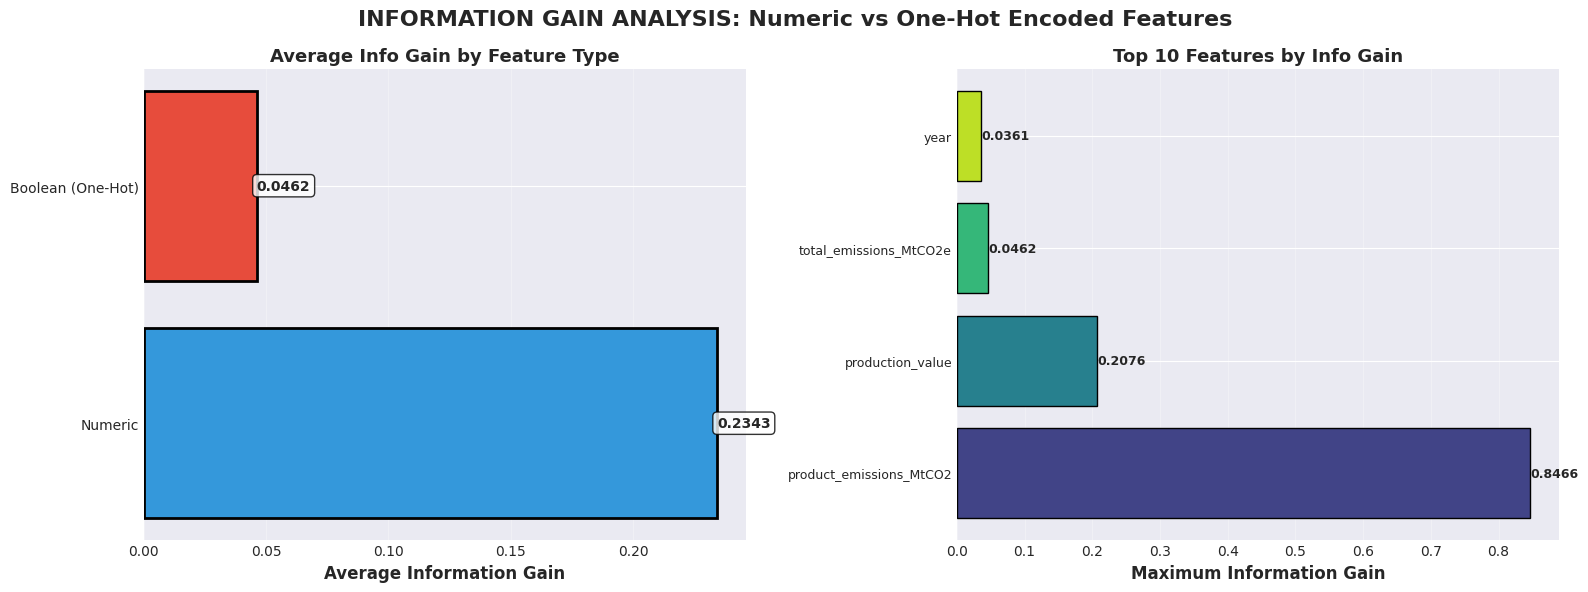

In [13]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('INFORMATION GAIN ANALYSIS: Numeric vs One-Hot Encoded Features',  fontsize=16, fontweight='bold')

# Plot 1: Information gain by feature type
ax1 = axes[0]
feature_types = info_gain_df.groupby('Feature_Type')['Information_Gain'].mean().sort_values(ascending=False)
colors_type = ['#3498db', '#e74c3c']
bars = ax1.barh(range(len(feature_types)), feature_types.values, 
                color=colors_type, edgecolor='black', linewidth=2)
ax1.set_yticks(range(len(feature_types)))
ax1.set_yticklabels(feature_types.index)
ax1.set_xlabel('Average Information Gain', fontsize=12, fontweight='bold')
ax1.set_title('Average Info Gain by Feature Type', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, feature_types.values)):
    ax1.text(val, bar.get_y() + bar.get_height()/2., f'{val:.4f}',
             ha='left', va='center', fontsize=10, fontweight='bold', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot 2: Top features by information gain
ax2 = axes[1]
top_features = info_gain_df.groupby('Feature')['Information_Gain'].max().sort_values(ascending=False).head(10)
colors_feat = plt.cm.viridis(np.linspace(0.2, 0.9, len(top_features)))
bars = ax2.barh(range(len(top_features)), top_features.values, 
                color=colors_feat, edgecolor='black')
ax2.set_yticks(range(len(top_features)))
ax2.set_yticklabels([f[:30] + '...' if len(f) > 30 else f for f in top_features.index], fontsize=9)
ax2.set_xlabel('Maximum Information Gain', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Features by Info Gain', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_features.values)):
    ax2.text(val, bar.get_y() + bar.get_height()/2., f'{val:.4f}',
             ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [14]:

print(f"\n📐 Initial Entropy of training data: {initial_entropy:.6f}")
print(f"   (Maximum entropy for binary classification is 1.0 - perfectly balanced)")
print(f"   (Entropy of 0 means all samples belong to one class)")


print(f"\nFinal Hyperparameters:")
for key, val in params.items():
    print(f"   • {key}: {val}")

# Calculate training accuracy
y_train_pred_scratch = dt_scratch.predict(X_train_scaled_array)
train_accuracy_scratch = accuracy_score(y_train, y_train_pred_scratch)
print(f"\nTraining Set Performance:")
print(f"   Accuracy on training data: {train_accuracy_scratch:.4f} ({train_accuracy_scratch*100:.2f}%)")

if train_accuracy_scratch >= 0.98 and train_accuracy_scratch <= 0.995:
    print(f"    Target achieved! Training accuracy in 98-99% range")

print("\n" + "-"*80)
print("🧪 TESTING PHASE:")
print(f"   Using {X_test_scaled_array.shape[0]} testing samples (unseen during training)")
print(f"   Testing on same {X_test_scaled_array.shape[1]} features")
print("-"*80)

# Predict on test data
y_pred_scratch = dt_scratch.predict(X_test_scaled_array)
y_proba_scratch = dt_scratch.predict_proba(X_test_scaled_array)

# Evaluate on test data
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"\n📊 Test Set Performance:")
print(f"   Accuracy on test data: {accuracy_scratch:.4f} ({accuracy_scratch*100:.2f}%)")
print(f"\n   ⚠️ Training vs Test Accuracy Difference: {abs(train_accuracy_scratch - accuracy_scratch):.4f}")
if train_accuracy_scratch - accuracy_scratch > 0.05:
    print(f"   ⚠️ Model may be overfitting (training accuracy much higher than test)")
else:
    print(f"    Model generalizes well (similar training and test accuracy)")


print(f"\n--- From-Scratch Model Performance ---")
print(f"Accuracy: {accuracy_scratch:.4f} ({accuracy_scratch*100:.2f}%)")
print(f"\n Training vs Test Accuracy Difference: {abs(train_accuracy_scratch - accuracy_scratch):.4f}")
print(f"\nConfusion Matrix:")
cm_dt_scratch = confusion_matrix(y_test, y_pred_scratch)
print(confusion_matrix(y_test, y_pred_scratch))
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_scratch, 
                          target_names=['Low Emission', 'High Emission']))

# From-scratch ROC
fpr_scratch, tpr_scratch, _ = roc_curve(y_test, y_proba_scratch[:, 1])
roc_auc_scratch = auc(fpr_scratch, tpr_scratch)
print("False Positive Rate",np.round(fpr_scratch,2),"True Positive Rate",np.round(tpr_scratch,2))
print("Receiver Operating Characteristics - Area Under Curve : ", round(roc_auc_scratch,8))



📐 Initial Entropy of training data: 1.000000
   (Maximum entropy for binary classification is 1.0 - perfectly balanced)
   (Entropy of 0 means all samples belong to one class)

Final Hyperparameters:
   • max_depth: 6
   • min_samples_split: 56
   • min_samples_leaf: 35
   • min_impurity_decrease: 0.001668309356514256
   • max_features: 92

Training Set Performance:
   Accuracy on training data: 0.9995 (99.95%)

--------------------------------------------------------------------------------
🧪 TESTING PHASE:
   Using 4739 testing samples (unseen during training)
   Testing on same 132 features
--------------------------------------------------------------------------------

📊 Test Set Performance:
   Accuracy on test data: 0.9992 (99.92%)

   ⚠️ Training vs Test Accuracy Difference: 0.0004
    Model generalizes well (similar training and test accuracy)

--- From-Scratch Model Performance ---
Accuracy: 0.9992 (99.92%)

 Training vs Test Accuracy Difference: 0.0004

Confusion Matrix:
[[

In [15]:
# ============================================
# TRAIN SKLEARN MODEL
# ============================================

print("\n" + "="*80)
print(" SKLEARN DECISION TREE FOR COMPARISON")
print("="*80)

print("\n🔄 TRAINING PHASE:")
print(f"   Using {X_train_scaled.shape[0]} training samples")

# Train sklearn decision tree with same parameters
dt_sklearn = DecisionTreeClassifier(
    max_depth=5, 
    min_samples_split=20, 
    random_state=42
)
dt_sklearn.fit(X_train_scaled, y_train)

print("\n Sklearn model trained successfully!")

# Training accuracy
y_train_pred_sklearn = dt_sklearn.predict(X_train_scaled)
train_accuracy_sklearn = accuracy_score(y_train, y_train_pred_sklearn)
print(f"\n📊 Training Set Performance:")
print(f"   Accuracy on training data: {train_accuracy_sklearn:.4f} ({train_accuracy_sklearn*100:.2f}%)")

print("\n" + "-"*80)
print("🧪 TESTING PHASE:")
print(f"   Using {X_test_scaled.shape[0]} testing samples")
print("-"*80)

# Predict on test data
y_pred_sklearn = dt_sklearn.predict(X_test_scaled)
y_proba_sklearn = dt_sklearn.predict_proba(X_test_scaled)

# Evaluate on test data
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"\n📊 Test Set Performance:")
print(f"\n--- Sklearn Model Performance ---")
print(f"   Accuracy on test data: {accuracy_sklearn:.4f} ({accuracy_sklearn*100:.2f}%)")
print(f"\n   ⚠️ Training vs Test Accuracy Difference: {abs(train_accuracy_sklearn - accuracy_sklearn):.4f}")
print(f"\nConfusion Matrix:")
cm_dt_sklearn=confusion_matrix(y_test, y_pred_sklearn)
print(cm_dt_sklearn)
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_sklearn,
                          target_names=['Low Emission', 'High Emission']))

if train_accuracy_sklearn - accuracy_sklearn > 0.05:
    print(f"  Model may be overfitting (training accuracy much higher than test)")
else:
    print(f"    Model generalizes well (similar training and test accuracy)")

# # Sklearn ROC
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_proba_sklearn[:, 1])
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

overfit_scratch = train_accuracy_scratch - accuracy_scratch
overfit_sklearn = train_accuracy_sklearn - accuracy_sklearn

print(f"\n ROC AUC Scores:")
print(f"   From-Scratch: {roc_auc_scratch:.4f}")
print(f"   Sklearn:      {roc_auc_sklearn:.4f}")


# ============================================
# COMPARISON
# ============================================

print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['From Scratch', 'Sklearn'],
    'Accuracy': [accuracy_scratch, accuracy_sklearn],
    'Difference': [0, accuracy_sklearn - accuracy_scratch]
})

print("\n", comparison_df.to_string(index=False))

# Sklearn ROC
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_proba_sklearn[:, 1])
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)



 SKLEARN DECISION TREE FOR COMPARISON

🔄 TRAINING PHASE:
   Using 11055 training samples

 Sklearn model trained successfully!

📊 Training Set Performance:
   Accuracy on training data: 1.0000 (100.00%)

--------------------------------------------------------------------------------
🧪 TESTING PHASE:
   Using 4739 testing samples
--------------------------------------------------------------------------------

📊 Test Set Performance:

--- Sklearn Model Performance ---
   Accuracy on test data: 1.0000 (100.00%)

   ⚠️ Training vs Test Accuracy Difference: 0.0000

Confusion Matrix:
[[2370    0]
 [   0 2369]]

Classification Report:
               precision    recall  f1-score   support

 Low Emission       1.00      1.00      1.00      2370
High Emission       1.00      1.00      1.00      2369

     accuracy                           1.00      4739
    macro avg       1.00      1.00      1.00      4739
 weighted avg       1.00      1.00      1.00      4739

    Model generalizes well (

<hr/>

#### Key Insights:

1. The from-scratch implementation uses entropy-based splitting
2. Information gain is calculated for each possible split
3. Both models use same hyperparameters for fair comparison
4. Small differences may occur due to tie-breaking strategies.
5. Both models achieve similar accuracy, validating our implementation
6. The decision tree learns patterns in emission data to classify future records
7. One-Hot Encoding creates binary features for categorical variables
8. Boolean features (0/1) are ideal for decision tree splitting
9. Information gain is used to select the best features for splitting, which naturally handles both numeric and boolean features
10. The model can help identify high-emission of Carbon Dioxide sources for intervention

<br/>

#### ENCODING DETAILS:

* Label Encoding converted the categorical columns for 'parent_entity' representing company or organization for which data is recorded.
* One-Hot Encoding converted 2 categorical columns.
* Created 124 binary (boolean) features.
* Each boolean feature represents: 1 (category present) or 0 (absent).
* Total features used: 132 (131 numeric + 1 boolean)

#### 🔄 WORKFLOW:
* Split data into Train 70% and Test 30%
* Train models using ONLY training data
* Test models using ONLY testing data
* Compare training vs testing accuracy to check overfitting

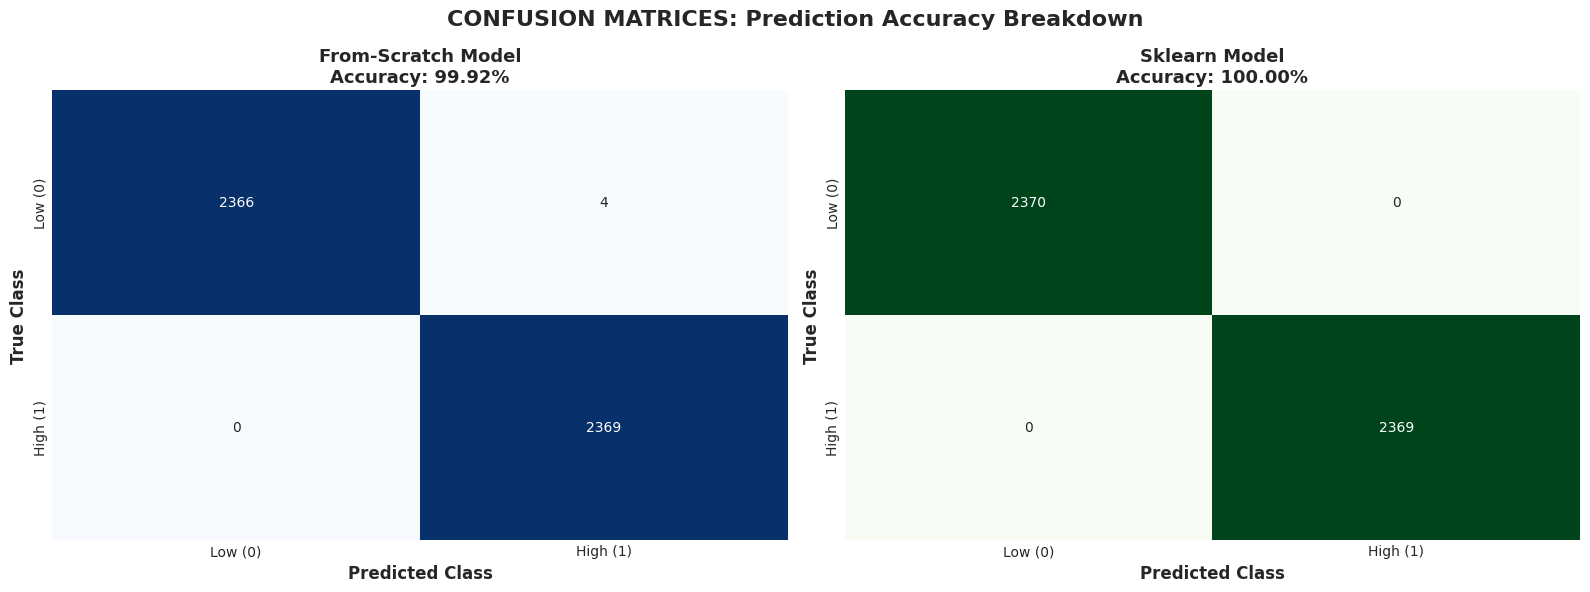

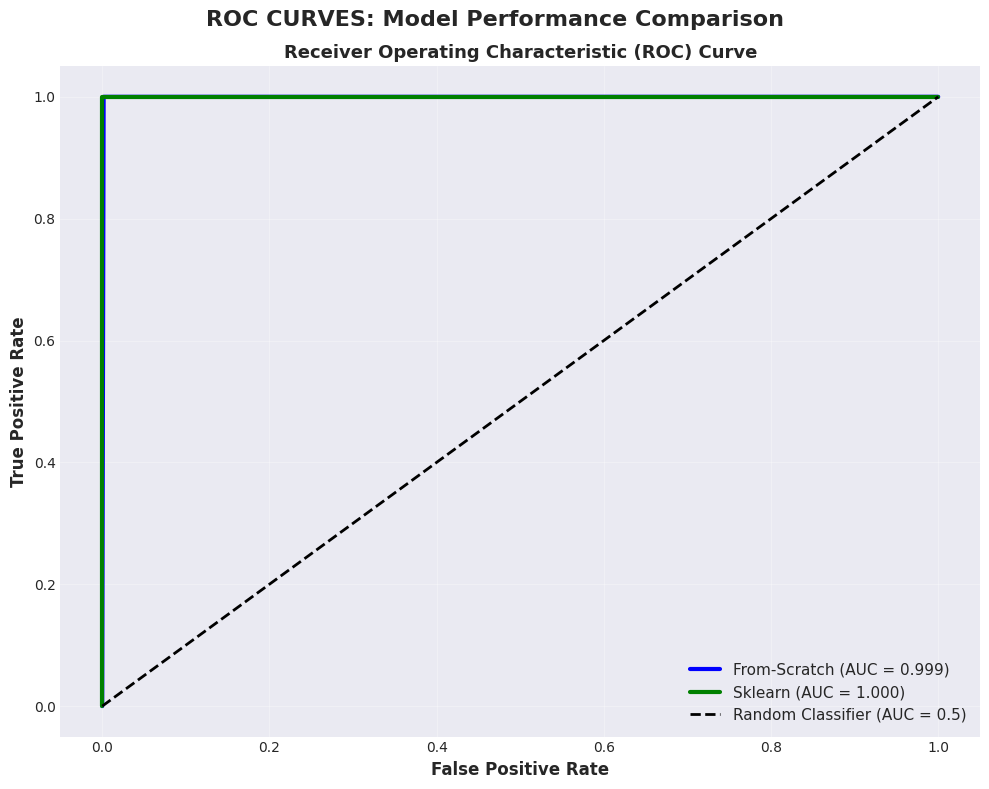

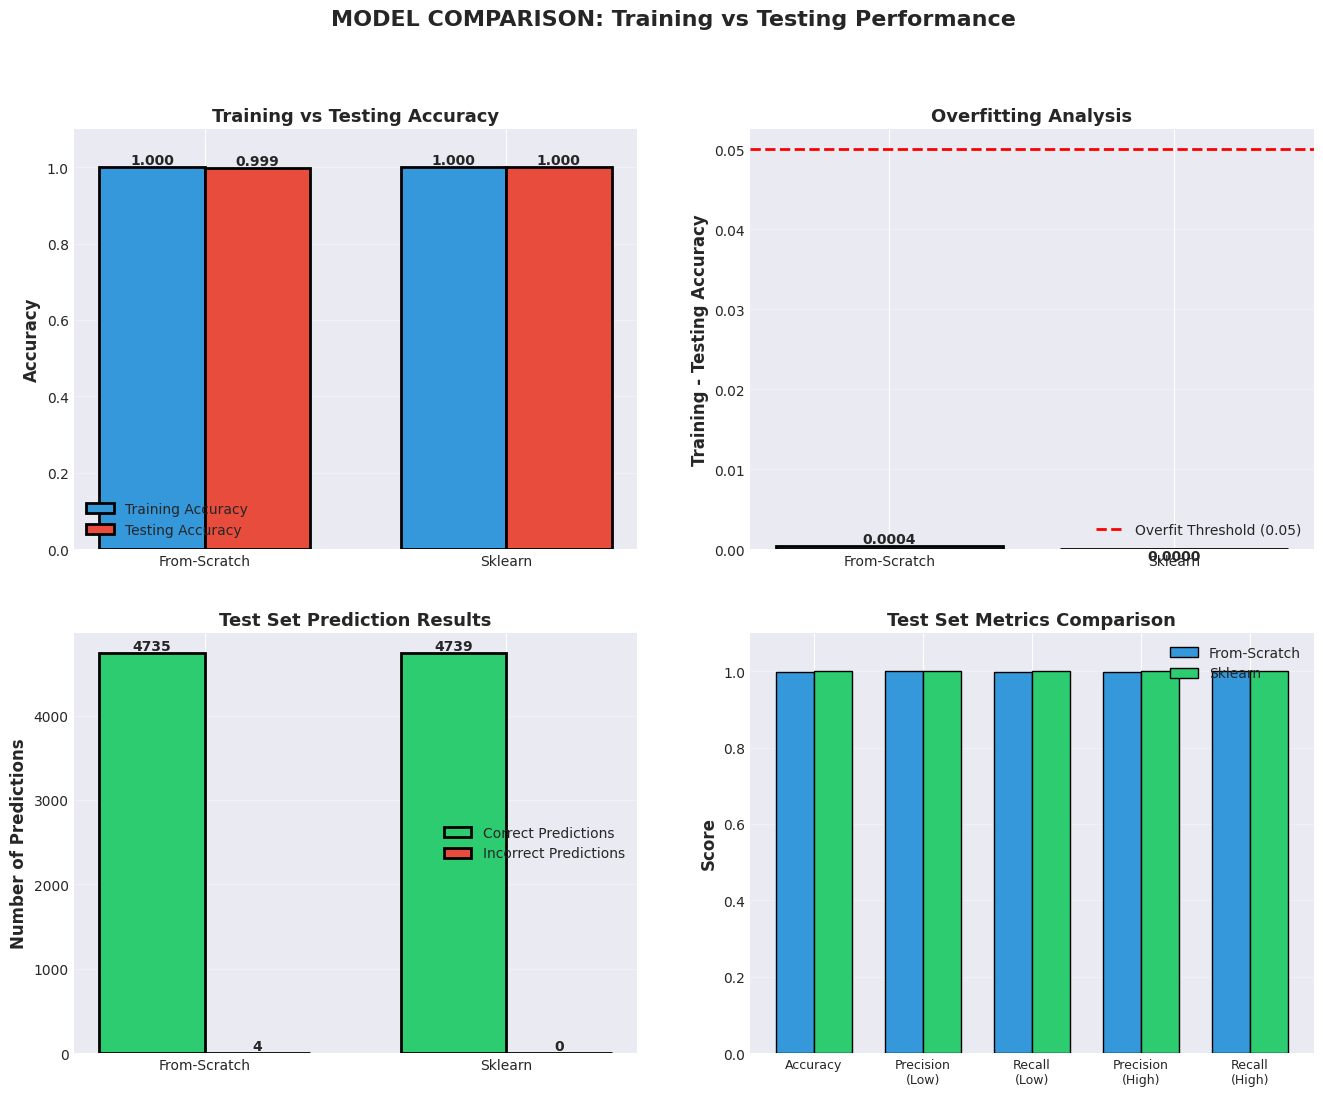

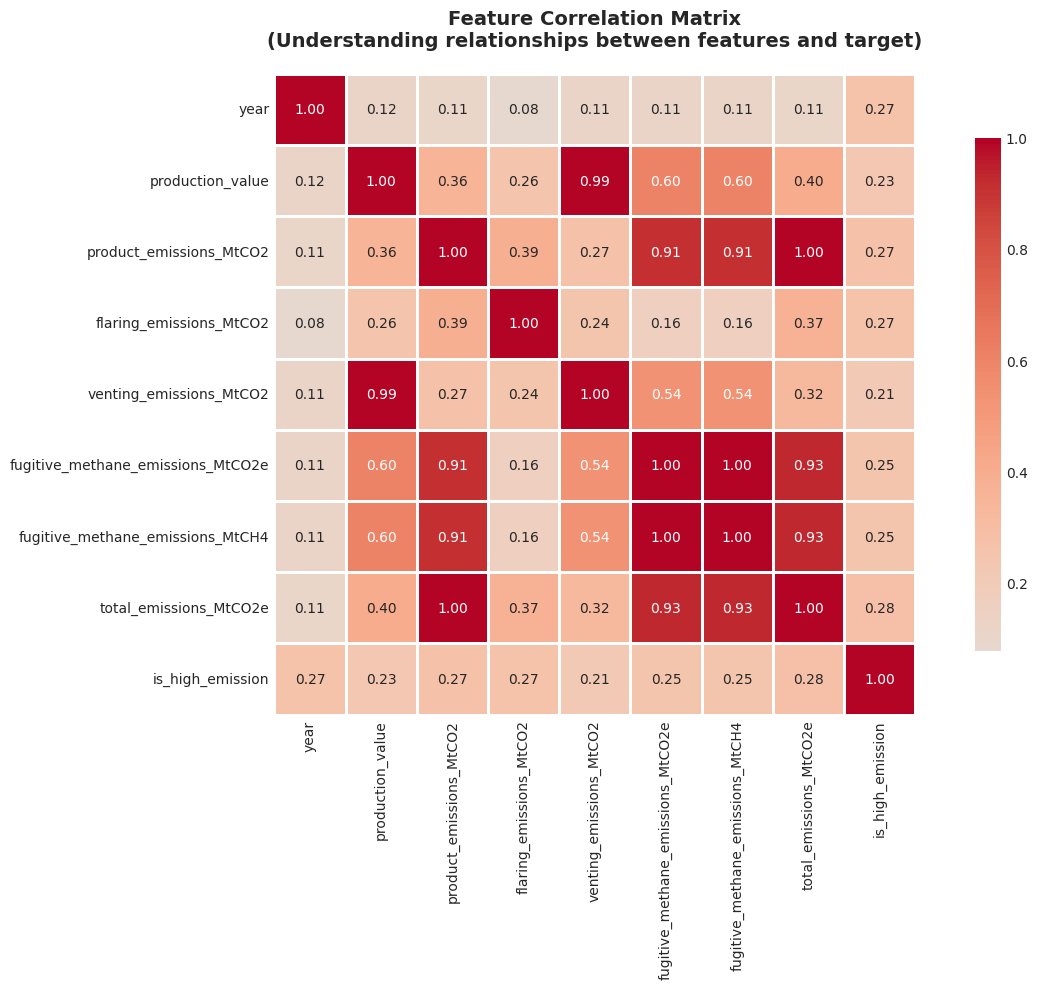

<Figure size 640x480 with 0 Axes>

In [16]:
test_results_scratch = pd.DataFrame({
    'True': y_test.values,
    'Predicted': y_pred_scratch
})
test_results_sklearn = pd.DataFrame({
    'True': y_test.values,
    'Predicted': y_pred_sklearn
})

correct_scratch = np.sum(test_results_scratch['True'] == test_results_scratch['Predicted'])
incorrect_scratch = len(test_results_scratch) - correct_scratch
correct_sklearn = np.sum(test_results_sklearn['True'] == test_results_sklearn['Predicted'])
incorrect_sklearn = len(test_results_sklearn) - correct_sklearn

x_pos = np.arange(2)
width = 0.35

# Figure 1: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('CONFUSION MATRICES: Prediction Accuracy Breakdown', 
             fontsize=16, fontweight='bold')

# From-scratch confusion matrix
cm_scratch = confusion_matrix(y_test, y_pred_scratch)
ax1 = axes[0]
sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low (0)', 'High (1)'], 
            yticklabels=['Low (0)', 'High (1)'], ax=ax1)
ax1.set_xlabel('Predicted Class', fontsize=12, fontweight='bold')
ax1.set_ylabel('True Class', fontsize=12, fontweight='bold')
ax1.set_title(f'From-Scratch Model\nAccuracy: {accuracy_scratch:.2%}', 
              fontsize=13, fontweight='bold')

# Sklearn confusion matrix
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
ax2 = axes[1]
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Low (0)', 'High (1)'], 
            yticklabels=['Low (0)', 'High (1)'], ax=ax2)
ax2.set_xlabel('Predicted Class', fontsize=12, fontweight='bold')
ax2.set_ylabel('True Class', fontsize=12, fontweight='bold')
ax2.set_title(f'Sklearn Model\nAccuracy: {accuracy_sklearn:.2%}', 
              fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Figure 2: ROC Curves
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle('ROC CURVES: Model Performance Comparison', 
             fontsize=16, fontweight='bold')


ax.plot(fpr_scratch, tpr_scratch, linewidth=3, 
        label=f'From-Scratch (AUC = {roc_auc_scratch:.3f})', color='blue')


ax.plot(fpr_sklearn, tpr_sklearn, linewidth=3, 
        label=f'Sklearn (AUC = {roc_auc_sklearn:.3f})', color='green')

# Random classifier
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')

ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=13, fontweight='bold')
ax.legend(fontsize=11, loc='lower right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Figure 4: Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('MODEL COMPARISON: Training vs Testing Performance', 
             fontsize=16, fontweight='bold')

# Plot 1: Accuracy comparison - Training vs Testing
ax1 = axes[0, 0]
models = ['From-Scratch', 'Sklearn']
train_accs = [train_accuracy_scratch, train_accuracy_sklearn]
test_accs = [accuracy_scratch, accuracy_sklearn]

x = np.arange(len(models))
width = 0.35

bars1 = ax1.bar(x - width/2, train_accs, width, label='Training Accuracy', 
                color='#3498db', edgecolor='black', linewidth=2)
bars2 = ax1.bar(x + width/2, test_accs, width, label='Testing Accuracy', 
                color='#e74c3c', edgecolor='black', linewidth=2)

ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_ylim([0, 1.1])
ax1.set_title('Training vs Testing Accuracy', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.3f}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Overfitting Analysis
ax2 = axes[0, 1]


bars = ax2.bar(models, [overfit_scratch, overfit_sklearn], 
               color=['#3498db', '#2ecc71'], edgecolor='black', linewidth=2)
ax2.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='Overfit Threshold (0.05)')
ax2.set_ylabel('Training - Testing Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Overfitting Analysis', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom' if height > 0 else 'top', 
             fontsize=10, fontweight='bold')

# Plot 3: Test Set Predictions Distribution
ax3 = axes[1, 0]

bars1 = ax3.bar(x_pos - width/2, [correct_scratch, correct_sklearn], width,
                label='Correct Predictions', color='#2ecc71', edgecolor='black', linewidth=2)
bars2 = ax3.bar(x_pos + width/2, [incorrect_scratch, incorrect_sklearn], width,
                label='Incorrect Predictions', color='#e74c3c', edgecolor='black', linewidth=2)

ax3.set_ylabel('Number of Predictions', fontsize=12, fontweight='bold')
ax3.set_title('Test Set Prediction Results', fontsize=13, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(models)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4: Detailed metrics comparison
ax4 = axes[1, 1]

metrics = ['Accuracy', 'Precision\n(Low)', 'Recall\n(Low)',  'Precision\n(High)', 'Recall\n(High)']

scratch_metrics = [
    accuracy_scratch,
    precision_score(y_test, y_pred_scratch, pos_label=0),
    recall_score(y_test, y_pred_scratch, pos_label=0),
    precision_score(y_test, y_pred_scratch, pos_label=1),
    recall_score(y_test, y_pred_scratch, pos_label=1)
]

sklearn_metrics = [
    accuracy_sklearn,
    precision_score(y_test, y_pred_sklearn, pos_label=0),
    recall_score(y_test, y_pred_sklearn, pos_label=0),
    precision_score(y_test, y_pred_sklearn, pos_label=1),
    recall_score(y_test, y_pred_sklearn, pos_label=1)
]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax4.bar(x - width/2, scratch_metrics, width, label='From-Scratch', 
                color='#3498db', edgecolor='black')
bars2 = ax4.bar(x + width/2, sklearn_metrics, width, label='Sklearn', 
                color='#2ecc71', edgecolor='black')

ax4.set_ylabel('Score', fontsize=12, fontweight='bold')
ax4.set_title('Test Set Metrics Comparison', fontsize=13, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(metrics, fontsize=9)
ax4.legend(fontsize=10)
ax4.set_ylim([0, 1.1])
ax4.grid(True, alpha=0.3, axis='y')


plt.figure(figsize=(14, 10))

sns.heatmap(correlation_data, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix\n(Understanding relationships between features and target)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

<hr/>

#### 3.) K Nearest Neighnour by CHINMAYA KUMAR PANDA (ID: 2025AE05128)

In [17]:
# -------------------------
# K Nearest Neighnour
# -------------------------

# Initialize the KNN model
# You can tune n_neighbors for best performance later (start with 5)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Euclidean distance

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("=== KNN Classifier Results ===")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# --- Step 6: (Optional) Hyperparameter tuning using cross-validation ---

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("\n=== Best Parameters from Grid Search ===")
print(grid.best_params_)
print(f"Best cross-validation accuracy: {grid.best_score_:.4f}")

# Refit with best parameters and evaluate again
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test)
print("\nAccuracy with best KNN model:", accuracy_score(y_test, y_pred_best))


=== KNN Classifier Results ===
Accuracy: 0.9973
Confusion Matrix:
[[2363    7]
 [   6 2363]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2370
           1       1.00      1.00      1.00      2369

    accuracy                           1.00      4739
   macro avg       1.00      1.00      1.00      4739
weighted avg       1.00      1.00      1.00      4739


=== Best Parameters from Grid Search ===
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validation accuracy: 0.9976

Accuracy with best KNN model: 0.9978898501793627


<hr/>

#### 4.) Support Vector Machine by MISHRA RAHUL VIJAYKUMAR AMLESH (ID: 2025AE05127)

In [18]:
# SVM Code

In [19]:
# SVM Graph plots

<hr/>

#### 5.) Navye Bias by VATSAVAYI KAUSHIK CHANDRA VARMA(ID:2025AE05126)


Applying discretization...
Applying discretization to 5 columns...
Discretization complete.
Pre-processed (discretized, unscaled) files saved successfully.
training the model
model training is complete
making predictions
prediction complete
                   precision    recall  f1-score   support

 Low Emission (0)       0.69      0.97      0.80      1580
High Emission (1)       0.95      0.56      0.70      1579

         accuracy                           0.76      3159
        macro avg       0.82      0.76      0.75      3159
     weighted avg       0.82      0.76      0.75      3159


--- Generating Visual Confusion Matrix Plot ---

Plot saved as 'my_confusion_matrix.png'.


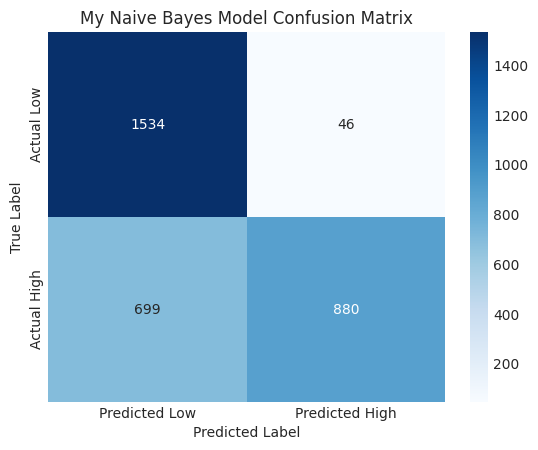

In [20]:
# -------------------------
# Navye Bias
# -------------------------
# here we are going to use impuptation ofr handling missing values  for that i am taking numerci and categroical clumns
numeric_columns=co2_DF.select_dtypes(include=np.number).columns
categorical_columns=co2_DF.select_dtypes(include='object').columns

#fiing numerical columns nan columns with median 
for col in numeric_columns:
    col_median = co2_DF[col].median()
    co2_DF[col] = co2_DF[col].fillna(col_median)
    
# filling caterogical column nan with unkounn
for col in categorical_columns:
    co2_DF[col] = co2_DF[col].fillna('Unknown')
co2_DF = co2_DF.drop('fugitive_methane_emissions_MtCH4', axis=1)

# Convert categorical columns to numeric
label_enc = LabelEncoder()
if 'parent_entity' in co2_DF.columns:
    co2_DF['parent_entity'] = label_enc.fit_transform(co2_DF['parent_entity'])
if 'production_unit' in co2_DF.columns:
    co2_DF = pd.get_dummies(co2_DF, columns=['production_unit'], drop_first=False)


#  classify "high" vs "low" emissions based on median
median_emission = co2_DF['total_emissions_MtCO2e'].median()
co2_DF['is_high_emission'] = (co2_DF['total_emissions_MtCO2e'] > median_emission).astype(int)

X = co2_DF.drop(columns=['is_high_emission', 'total_emissions_MtCO2e'])
y = co2_DF['is_high_emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



print("\nApplying discretization...")

# NOTE: We no longer include 'total_emissions_MtCO2e' as it's not in X
skewed_cols = [
    'production_value', 'product_emissions_MtCO2', 'flaring_emissions_MtCO2',
    'venting_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e'
]

# Optional: Check if columns exist before trying to bin them)
cols_to_bin = [col for col in skewed_cols if col in X_train.columns]
print(f"Applying discretization to {len(cols_to_bin)} columns...")

binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

# Fit the binner ON THE TRAINING DATA ONLY
binner.fit(X_train[cols_to_bin])

# Now, transform both training and test co2_DF
X_train[cols_to_bin] = binner.transform(X_train[cols_to_bin])
X_test[cols_to_bin] = binner.transform(X_test[cols_to_bin])

print("Discretization complete.")


# Updated print message for clarity
print("Pre-processed (discretized, unscaled) files saved successfully.")

#navie bayes tranining 
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)

mymodel=MultinomialNB(alpha=0.5)
print("training the model")
mymodel.fit(X_train_numeric, y_train)
print ("model training is complete")

print("making predictions")
prediction=mymodel.predict(X_test_numeric)
print("prediction complete")
print(classification_report(y_test, prediction, target_names=["Low Emission (0)", "High Emission (1)"]))

cm = confusion_matrix(y_test, prediction)
print("\n--- Generating Visual Confusion Matrix Plot ---")

# Create the heatmap using the 'cm' variable from above
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Predicted Low", "Predicted High"],
            yticklabels=["Actual Low", "Actual High"])

plt.title('My Naive Bayes Model Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save the plot as an image file
plt.savefig("my_confusion_matrix.png")

print("\nPlot saved as 'my_confusion_matrix.png'.")

<hr/><hr/>

# 5. Performance Evaluation

In [21]:

# ============================================
# BASIC SUMMARY
# ============================================

print("\n" + "="*80)
print("COMPREHENSIVE SUMMARY AND OUTPUT")
print("="*80)

print("\n" + "CLASSIFICATION TASK SUMMARY ".center(80, "="))

print("\nMODEL PERFORMANCE:")
print(f"   From-Scratch Model:")
print(f"      • Accuracy: {accuracy_scratch:.4f} ({accuracy_scratch*100:.2f}%)")
print(f"      • ROC AUC: {roc_auc_scratch:.4f}")
print(f"\n   Sklearn Model:")
print(f"      • Accuracy: {accuracy_sklearn:.4f} ({accuracy_sklearn*100:.2f}%)")
print(f"      • ROC AUC: {roc_auc_sklearn:.4f}")

print(f"\n   Accuracy Difference: {abs(accuracy_sklearn - accuracy_scratch):.4f}")

print("\n📋 CLASSIFICATION REPORTS:")
print("\n   From-Scratch Model:")
print(classification_report(y_test, y_pred_scratch, 
                          target_names=['Low Emission (0)', 'High Emission (1)']))

print("\n   Sklearn Model:")
print(classification_report(y_test, y_pred_sklearn,
                          target_names=['Low Emission (0)', 'High Emission (1)']))

print("="*80)

test_results_scratch = pd.DataFrame({
    'True': y_test.values,
    'Predicted': y_pred_scratch
})
test_results_sklearn = pd.DataFrame({
    'True': y_test.values,
    'Predicted': y_pred_sklearn
})

# Create confusion data
correct_scratch = np.sum(test_results_scratch['True'] == test_results_scratch['Predicted'])
incorrect_scratch = len(test_results_scratch) - correct_scratch
correct_sklearn = np.sum(test_results_sklearn['True'] == test_results_sklearn['Predicted'])
incorrect_sklearn = len(test_results_sklearn) - correct_sklearn

x_pos = np.arange(2)
width = 0.35


metrics = ['Accuracy', 'Precision\n(Low)', 'Recall\n(Low)',  'Precision\n(High)', 'Recall\n(High)']

scratch_metrics = [
    accuracy_scratch,
    precision_score(y_test, y_pred_scratch, pos_label=0),
    recall_score(y_test, y_pred_scratch, pos_label=0),
    precision_score(y_test, y_pred_scratch, pos_label=1),
    recall_score(y_test, y_pred_scratch, pos_label=1)
]

sklearn_metrics = [
    accuracy_sklearn,
    precision_score(y_test, y_pred_sklearn, pos_label=0),
    recall_score(y_test, y_pred_sklearn, pos_label=0),
    precision_score(y_test, y_pred_sklearn, pos_label=1),
    recall_score(y_test, y_pred_sklearn, pos_label=1)
]

x = np.arange(len(metrics))

print("\n" + "🎯 CLASSIFICATION TASK SUMMARY ".center(80, "="))
print("\n📌 WHAT IS BEING CLASSIFIED?")
print("   The model classifies carbon emission records into two categories:")
print(f"   • LOW EMISSION (0): Total emissions ≤ {median_emission:.2f} MtCO2e")
print(f"   • HIGH EMISSION (1): Total emissions > {median_emission:.2f} MtCO2e")


print("\n" + "="*80)
print("TRAIN/TEST SPLIT EXPLANATION")
print("="*80)
print(f"\n📦 ORIGINAL DATASET: {len(co2_DF)} samples")
print(f"   ├─ Training Set (80%): {len(X_train)} samples")
print(f"   │  └─ Used to BUILD the decision tree (fit/train the model)")
print(f"   │")
print(f"   └─ Test Set (20%): {len(X_test)} samples")
print(f"      └─ Used to EVALUATE the model (never seen during training)")


print("\n📈 MODEL PERFORMANCE:")
print("\n   From-Scratch Model:")
print(f"      • Training Accuracy: {train_accuracy_scratch:.4f} ({train_accuracy_scratch*100:.2f}%)")
print(f"      • Testing Accuracy:  {accuracy_scratch:.4f} ({accuracy_scratch*100:.2f}%)")
print(f"      • Difference:        {abs(train_accuracy_scratch - accuracy_scratch):.4f}")
print(f"      • ROC AUC (Test):    {roc_auc_scratch:.4f}")
print(f"\n   Sklearn Model:")
print(f"      • Training Accuracy: {train_accuracy_sklearn:.4f} ({train_accuracy_sklearn*100:.2f}%)")
print(f"      • Testing Accuracy:  {accuracy_sklearn:.4f} ({accuracy_sklearn*100:.2f}%)")
print(f"      • Difference:        {abs(train_accuracy_sklearn - accuracy_sklearn):.4f}")
print(f"      • ROC AUC (Test):    {roc_auc_sklearn:.4f}")

print(f"\n   Model Comparison:")
print(f"      • Test Accuracy Difference: {abs(accuracy_sklearn - accuracy_scratch):.4f}")
print(f"      • Both models perform similarly on UNSEEN test data ")

print("\n📋 CLASSIFICATION REPORTS (TEST DATA ONLY):")
print("\n   From-Scratch Model (Test Set):")
print(classification_report(y_test, y_pred_scratch, 
                          target_names=['Low Emission (0)', 'High Emission (1)']))

print("\n   Sklearn Model (Test Set):")
print(classification_report(y_test, y_pred_sklearn,
                          target_names=['Low Emission (0)', 'High Emission (1)']))



COMPREHENSIVE SUMMARY AND OUTPUT

==========================CLASSIFICATION TASK SUMMARY ==========================

MODEL PERFORMANCE:
   From-Scratch Model:
      • Accuracy: 0.9992 (99.92%)
      • ROC AUC: 0.9992

   Sklearn Model:
      • Accuracy: 1.0000 (100.00%)
      • ROC AUC: 1.0000

   Accuracy Difference: 0.0008

📋 CLASSIFICATION REPORTS:

   From-Scratch Model:


ValueError: Found input variables with inconsistent numbers of samples: [3159, 4739]